# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("samples.json")
df.head()

,names,metadata,samples
0,940,"{'id': 940, 'ethnicity': 'Caucasian', 'gender'...","{'id': '940', 'otu_ids': [1167, 2859, 482, 226..."
1,941,"{'id': 941, 'ethnicity': 'Caucasian/Midleaster...","{'id': '941', 'otu_ids': [2722, 944, 2419, 253..."
2,943,"{'id': 943, 'ethnicity': 'Caucasian', 'gender'...","{'id': '943', 'otu_ids': [1795], 'sample_value..."
3,944,"{'id': 944, 'ethnicity': 'European', 'gender':...","{'id': '944', 'otu_ids': [922, 3555, 943, 1013..."
4,945,"{'id': 945, 'ethnicity': 'Caucasian', 'gender'...","{'id': '945', 'otu_ids': [944, 1795, 922, 2419..."


# Extract dictionary column to a dataframe: apply(pd.Series)

In [4]:
metadata_df = df["metadata"].apply(pd.Series)
metadata_df.head()

,id,ethnicity,gender,age,location,bbtype,wfreq
0,940,Caucasian,F,24.0,Beaufort/NC,I,2.0
1,941,Caucasian/Midleastern,F,34.0,Chicago/IL,I,1.0
2,943,Caucasian,F,49.0,Omaha/NE,I,1.0
3,944,European,M,44.0,NewHaven/CT,I,1.0
4,945,Caucasian,F,48.0,Philidelphia/PA,I,1.0


In [5]:
samples_df = df["samples"].apply(pd.Series)
samples_df.head()

samples_df['id'] = samples_df['id'].astype(int)

In [6]:
names = df["names"]
names_df = pd.DataFrame(names, columns=['names'])

In [7]:
temp_df = names_df.merge(metadata_df, left_on='names', right_on='id')
temp_df.head()

,names,id,ethnicity,gender,age,location,bbtype,wfreq
0,940,940,Caucasian,F,24.0,Beaufort/NC,I,2.0
1,941,941,Caucasian/Midleastern,F,34.0,Chicago/IL,I,1.0
2,943,943,Caucasian,F,49.0,Omaha/NE,I,1.0
3,944,944,European,M,44.0,NewHaven/CT,I,1.0
4,945,945,Caucasian,F,48.0,Philidelphia/PA,I,1.0


In [164]:
data_df = temp_df.merge(samples_df, left_on='id', right_on='id')
data_df.tail()

,names,id,ethnicity,gender,age,location,bbtype,wfreq,otu_ids,sample_values,otu_labels
148,1574,1574,Caucasian,M,30.0,OK,I,7.0,"[482, 909, 2419, 944, 1795, 1167, 2859, 922, 2...","[29, 18, 16, 15, 14, 14, 14, 13, 13, 9, 7, 5, ...","[Bacteria, Bacteria;Actinobacteria;Actinobacte..."
149,1576,1576,Caucasian,F,33.0,NC,I,0.0,"[1929, 1770, 1926, 151, 1016, 3064, 477, 3184,...","[121, 83, 10, 9, 9, 8, 7, 6, 6, 5, 5, 4, 2, 2,...",[Bacteria;Firmicutes;Bacilli;Lactobacillales;S...
150,1577,1577,Caucasian,M,26.0,NC,I,0.0,"[922, 1795, 151, 3184, 1770, 1929, 3134, 1399,...","[152, 130, 10, 9, 6, 6, 5, 4, 4, 3, 3, 3, 3, 3...",[Bacteria;Actinobacteria;Actinobacteria;Actino...
151,1581,1581,Asian(American),F,22.0,NC,I,2.0,"[1795, 3312, 1399, 3134, 3288, 3120, 151, 954,...","[176, 57, 10, 10, 9, 8, 6, 6, 6, 5, 5, 5, 4, 3...",[Bacteria;Firmicutes;Bacilli;Bacillales;Staphy...
152,1601,1601,Caucasian,F,22.0,NC,I,2.0,"[1929, 3030, 1795, 894, 1167, 1926, 3042, 1930...","[166, 129, 97, 94, 73, 51, 32, 32, 25, 22, 16,...",[Bacteria;Firmicutes;Bacilli;Lactobacillales;S...


In [9]:
otu_ids = list(map(str, data_df['otu_ids'][0][0:10]))
otu_ids

['1167', '2859', '482', '2264', '41', '1189', '352', '189', '2318', '1977']

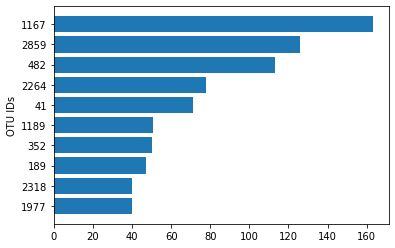

<Figure size 216x288 with 0 Axes>

In [10]:
plt.barh(otu_ids, data_df['sample_values'][0][0:10])
plt.gca().invert_yaxis()

plt.ylabel('OTU IDs')
plt.figure(figsize=(3, 4))
plt.show()

In [11]:
len(data_df['otu_ids'])

153

# Interactive Plots in Jupyter Notebook

In [12]:
import textwrap

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import IPython.display
from IPython.display import display, clear_output

import plotly.graph_objects as go

In [13]:
id_list = data_df['id'].tolist()

In [20]:
data_df.loc[data_df['id'] == 941]['sample_values'][1][0:10]
#data_df.loc[data_df['id'] == 941]['otu_ids'][0][0:10]

[194, 178, 162, 92, 84, 40, 37, 28, 27, 24]

In [130]:
data_df[data_df['id']==941].index.values
data_df.loc[data_df['id'] == 940]['wfreq'][0]

2.0

# Interactive Plots (bar and bubble) using ipywidgets interact

# These are only shown in Jupyter notebook.

In [163]:
from ipywidgets import interact, interactive
import plotly.graph_objects as go

import seaborn as sns

id_list = data_df['id'].values.tolist()

@interact
def show_plots(column='id', x=940):
    
    if x in id_list:
        
        print('\n Demographic Information\n')
        print(data_df.loc[data_df[column] == x, ['names', 'ethnicity', 'gender', 'age', 'location', 'wfreq']])
        print('\n')
        
        # Interactive bubble chart
        
        index = int(data_df[data_df[column]==x].index.values)
    
        otu_id = data_df.loc[data_df[column] == x]['otu_ids'][index][0:]

        size = data_df.loc[data_df[column] == x]['sample_values'][index][0:]
        
        my_new_list = [i * 50 for i in size]
    
        colors = np.random.rand(len(otu_id))
    
        fig1 = sns.scatterplot(otu_id, size, s=my_new_list, alpha=0.5, c=colors)
        plt.xlabel('OTU ID')
        plt.ylabel('Sample Value')
        plt.show()
        
        # interactive bar graph
        
        otu_id_10 = data_df.loc[data_df[column] == x]['otu_ids'][index][0:10]
        otu_id_10 = list(map(str, data_df['otu_ids'][index][0:10]))

        size_10 = data_df.loc[data_df[column] == x]['sample_values'][index][0:10]
    
        fig2 = plt.barh(otu_id_10, size_10)
        plt.gca().invert_yaxis()
        
        plt.ylabel('OTU IDs')
        plt.figure(figsize=(3, 4))
        
        plt.show()
        
        fig3 = go.Figure(go.Indicator(
            domain = {'x': [0, 1], 'y': [0, 1]},
            mode = "gauge+number",
            value = data_df.loc[data_df[column] == x]['wfreq'][index],
            title = {'text': "Belly Button Washing Frequency<br>Scrubs per Week"},
            gauge = {'bar': {'color': "red"},
                     'axis': {'range': [None, 9]},
                     'steps': [{'range': [0, 1], 'color': 'rgb(248, 243, 236)'},
                               {'range': [1, 2], 'color': 'rgb(244, 241, 229)'},
                               {'range': [2, 3], 'color': 'rgb(233, 230, 202)'},
                               {'range': [3, 4], 'color': 'rgb(229, 231, 179)'},
                               {'range': [4, 5], 'color': 'rgb(213, 228, 157)'},
                               {'range': [5, 6], 'color': 'rgb(183, 204, 146)'},
                               {'range': [6, 7], 'color': 'rgb(140, 191, 136)'},
                               {'range': [7, 8], 'color': 'rgb(138, 187, 143)'},
                               {'range': [8, 9], 'color': 'rgb(133, 180, 138)'}
                              ]}
                     ))
        fig3.show()

interactive(children=(Text(value='id', description='column'), IntSlider(value=940, description='x', max=2820, …

In [122]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is FE3C-B042

 Directory of C:\Users\hyeji\Desktop\Penn_BootCamp\Homework\14-Interactive-Web-Visualizations\Instructions\StarterCode

07/08/2022  01:59 PM    <DIR>          .
07/08/2022  01:59 PM    <DIR>          ..
07/08/2022  01:14 PM    <DIR>          .ipynb_checkpoints
07/07/2022  09:26 PM             1,566 index.html
07/08/2022  01:59 PM            33,445 Interactive_Belly_Button.ipynb
06/25/2022  12:51 PM           449,080 samples.json
06/25/2022  12:51 PM    <DIR>          static
               3 File(s)        484,091 bytes
               4 Dir(s)   4,717,731,840 bytes free
